<a href="https://colab.research.google.com/github/AceRb6/Analitica-y-visualizacion-avanzada-de-datos/blob/main/Practica05_AVDA_CPIDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practica 5 - Reducción dimensional**

## **Carga de dependencias para análisis de datos y modelado**

In [ ]:
import numpy as np
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import cross_val_score, KFold
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [ ]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1TRNN4R1UEL5EoQeUwV2vqw_pDtohx-n_' -O data.csv

--2025-04-02 07:17:00--  https://drive.google.com/uc?export=download&id=1TRNN4R1UEL5EoQeUwV2vqw_pDtohx-n_
Resolving drive.google.com (drive.google.com)... 172.253.117.138, 172.253.117.100, 172.253.117.113, ...
Connecting to drive.google.com (drive.google.com)|172.253.117.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1TRNN4R1UEL5EoQeUwV2vqw_pDtohx-n_&export=download [following]
--2025-04-02 07:17:00--  https://drive.usercontent.google.com/download?id=1TRNN4R1UEL5EoQeUwV2vqw_pDtohx-n_&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.107.132, 2607:f8b0:400e:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.107.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22878 (22K) [application/octet-stream]
Saving to: ‘data.csv’

data.csv            100%[===================>]  22.34K  --.-KB/s   

**## Analisis del dataset**

In [ ]:
data = read_csv('data.csv')
display(data.head())

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [ ]:
display(data.info())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

None

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


Se puede observar que se cuenta con unos datos nulos en "Salary" entonces decidimos quitarlos del dataset

In [ ]:
# Eliminar Nulos
data=data.dropna(subset=['Salary'])

Consideramos nuestra variable objetivo

In [ ]:
# Separar variables
X=data.drop(['Salary'], axis=1)
y=data['Salary']

Como se tenia categoricos se codificaron con dummies

In [ ]:
# Codificar categoricos
X=pd.get_dummies(X, drop_first=True)

In [ ]:
# ver valores faltantes
X.isnull().sum()

,0
AtBat,0
Hits,0
HmRun,0
Runs,0
RBI,0
Walks,0
Years,0
CAtBat,0
CHits,0
CHmRun,0


Ahora si una vez limpio el dataset y codificado podemos estandarizar.

In [ ]:
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **PCA**

## A) La regresión de componentes principales (PCR) se puede realizar utilizando PCA() de sklearn.decomposition, con el fin de predecir Salary. Haga una validación cruzada para determinar el mejor número de predictores.

In [ ]:
# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Validacion cruzada
mse=[]
for i in range(1, X_pca.shape[1]+1):
  score=cross_val_score(LinearRegression(), X_pca[:,:i], y, cv=10, scoring='neg_mean_squared_error')
  mse.append(-score.mean())

In [ ]:
# Determinar el mejor numero de componentes
B_comp=np.argmin(mse)
print('Mejor numero de componentes:', B_comp+1)

Mejor numero de componentes: 18


## **B) Gráfico de MSE vs num. de predictores**

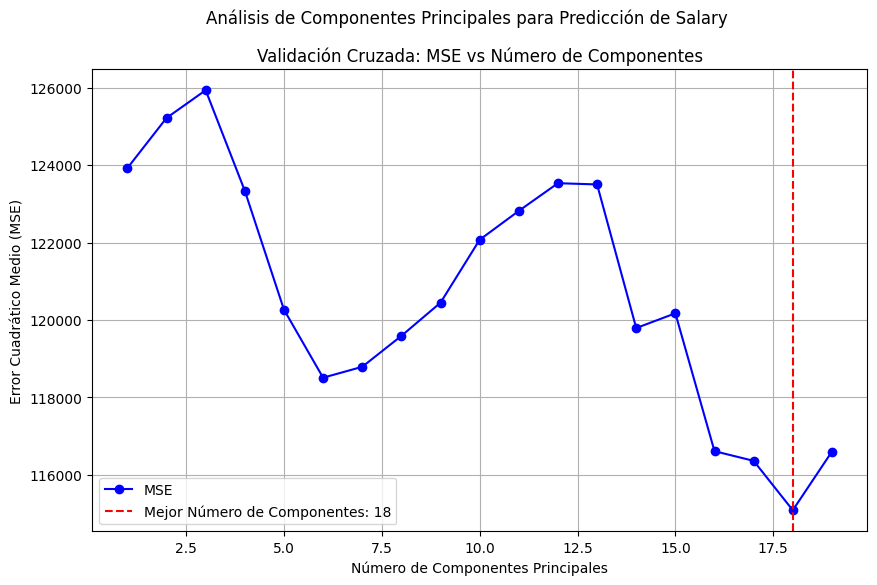

In [ ]:
# Graficar MSE vs Número de Componentes
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mse) + 1), mse, marker='o', linestyle='-', color='b', label='MSE')
plt.axvline(B_comp + 1, color='r', linestyle='--', label=f'Mejor Número de Componentes: {B_comp + 1}')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Validación Cruzada: MSE vs Número de Componentes')
plt.suptitle('Análisis de Componentes Principales para Predicción de Salary', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


El uso de 18 componentes principales parece ser el equilibrio ideal entre la capacidad predictiva y la generalización del modelo. Este número minimiza el MSE en la validación cruzada, lo que indica que el modelo es robusto frente a variaciones en los datos de entrenamiento.

El PCA ha logrado reducir la dimensionalidad del conjunto de datos original (que tenía 20 características) mientras mantiene la capacidad de predecir el salario de manera efectiva. Esto con el fin de reducir la eficiencia computacional y el modelo.

El desempeño del modelo es sensible al número de componentes principales. Es crucial realizar una validación cruzada para identificar el número óptimo, ya que tanto pocos como muchos componentes pueden perjudicar el desempeño.

## **C) Determine el explained_variance_ratio_ de cada predictor**

In [ ]:
# Varianza explicada por componente en formato de tabla
Var_exp = pca.explained_variance_ratio_

# Crear un DataFrame para mostrar la información
variance_df = pd.DataFrame({
    'Componente': range(1, len(Var_exp) + 1),
    'Varianza Explicada': Var_exp,
    'Varianza Explicada Acumulada': np.cumsum(Var_exp)
})

# Mostrar la tabla
print("Varianza Explicada por Componente:")
display(variance_df)


Varianza Explicada por Componente:


,Componente,Varianza Explicada,Varianza Explicada Acumulada
0,1,0.383142,0.383142
1,2,0.218411,0.601553
2,3,0.106864,0.708417
3,4,0.081925,0.790342
4,5,0.052561,0.842903
5,6,0.043445,0.886348
6,7,0.036281,0.922629
7,8,0.027002,0.949630
8,9,0.013196,0.962827
9,10,0.009727,0.972554


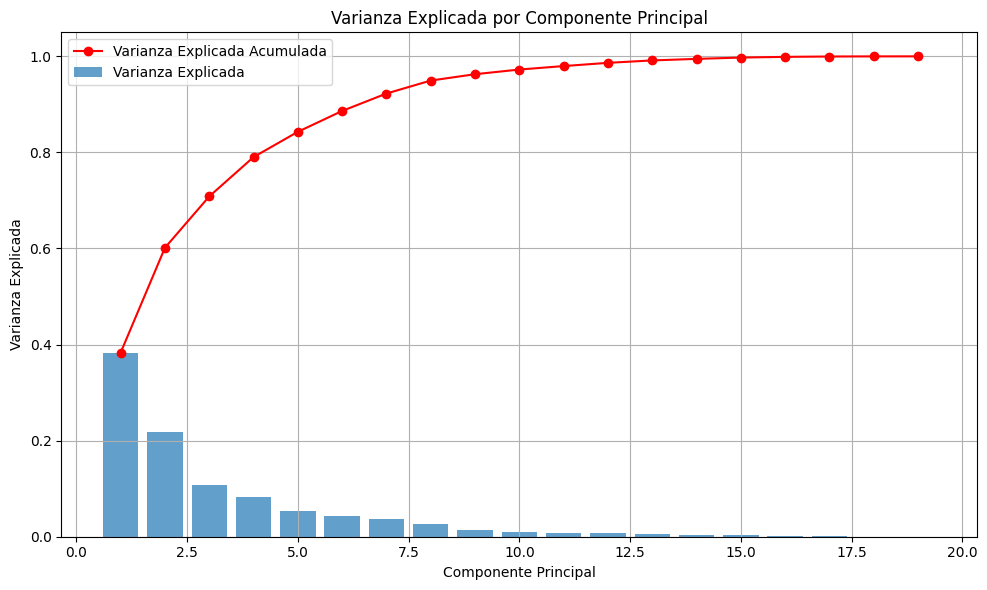

In [ ]:
# graficar varianza explicada y acumulada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(Var_exp) + 1), Var_exp, alpha=0.7, label='Varianza Explicada')
plt.plot(range(1, len(Var_exp) + 1), np.cumsum(Var_exp), color='r', marker='o', linestyle='-', label='Varianza Explicada Acumulada')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Los primeros componentes principales son los más informativos, ya que explican la mayor parte de la varianza en los datos. Esto sugiere que estos componentes capturan las relaciones más significativas entre las variables originales.

El primer componente explica casi 38% de la varianza, lo que indica que es el más importante para representar la estructura subyacente de los datos. no obstante los siguientes componentes (segundo y tercero) también son relevantes, pero su importancia disminuye progresivamente.

A medida que se agregan más componentes, la varianza explicada por cada uno de ellos disminuye drásticamente. Esto es esperable, ya que los componentes posteriores capturan variaciones menores o ruido en los datos.

Este patrón confirma que no es necesario conservar todos los componentes principales para mantener la capacidad predictiva del modelo.

La varianza acumulada alcanza cerca del 97% con solo 10 componentes principales . Esto significa que se puede reducir significativamente la dimensionalidad del conjunto de datos sin perder mucha información relevante.
Sin embargo, en este caso, se seleccionaron 18 componentes principales basándose en la validación cruzada (MSE mínimo).

Esto sugiere que, aunque los últimos componentes explican poca varianza individualmente, podrían estar contribuyendo al desempeño predictivo del modelo al capturar patrones más sutiles en los datos.

In [ ]:
# Evaluacion del modelo
n_comp=B_comp+1
pls = PLSRegression(n_components=n_comp)
pls.fit(X_pca[:,:n_comp], y)
y_pred = pls.predict(X_pca[:,:n_comp])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca[:,:n_comp], y, test_size=0.2, random_state=42)

pls = PLSRegression(n_components=n_comp)
pls.fit(X_train, y_train)
y_pred = pls.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Error Cuadrático Medio (MSE):", mse)
print("coeficiente de determinación:", pls.score(X_test, y_test))

Error Cuadrático Medio (MSE): 128416.30457710319
coeficiente de determinación: 0.29001561399644327


Un valor alto de MSE indica que el modelo tiene errores significativos en sus predicciones. Esto podría deberse a varios factores, como la complejidad inherente del problema, la presencia de ruido en los datos o la incapacidad del modelo para capturar ciertas relaciones no lineales.

Un coeficiente de determinación de 0.29 indica que el modelo explica aproximadamente 29% de la varianza en los datos de prueba. Esto sugiere que el modelo tiene un desempeño moderado, pero podría mejorar con ajustes adicionales.

# **PLS**

En mi caso fue necesario volver a hacer este proceso de seleccion y limpieza, intente hacer uno general pero me causo graficas que no tenian sentido en el desarrollo de la practica

In [ ]:
#PLS Regresion con validacion cruzada
# Separar variables
X=data.drop(['Salary'], axis=1)
y=data['Salary']

In [ ]:
# Codificar categoricos
X=pd.get_dummies(X, drop_first=True)

In [ ]:
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Ahora con el dataset podemos evaluar los cross score para poder ver el numero optimo de componentes

## **a) Implemente PLSRegression() de sklearn.cross_decomposition para determinar el mejor número de predictores usando CV.**


In [ ]:
# Evaluar mse para distintos componentes
mse=[]
Comp_max=min(X_scaled.shape[1],20)
for i in range(1, Comp_max+1):
  score=cross_val_score(PLSRegression(n_components=i), X_scaled, y, cv=10, scoring='neg_mean_squared_error')
  mse.append(-score.mean())

In [ ]:
# Mejor numero de componentes
B_comp=np.argmin(mse)
print('Mejor numero de componentes:', B_comp+1)

Mejor numero de componentes: 14


In [ ]:
# Modelo considerando 14 componentes
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
pls = PLSRegression(n_components=B_comp+1)
pls.fit(X_train, y_train)
y_pred = pls.predict(X_test)
mse_m = mean_squared_error(y_test, y_pred)
print("Error Cuadrático Medio (MSE):", mse_m)
print("coeficiente de determinación:", pls.score(X_test, y_test))

Error Cuadrático Medio (MSE): 127102.81508828647
coeficiente de determinación: 0.29727759705467516


In [ ]:
#Tabla comparativa de resultados
resultado=pd.DataFrame({'Salario Real': y_test, 'Salario Predicho': y_pred})
display(resultado)

,Salario Real,Salario Predicho
148,850.000,585.344893
154,277.500,708.372511
318,875.000,898.104519
279,150.000,405.892551
88,260.000,279.098657
307,277.500,343.851882
221,210.000,644.438914
268,140.000,401.445306
10,517.143,862.370940
132,325.000,651.947289


El modelo PLSRegression logra un desempeño moderado con un $R^2$
de 0.297 , lo que indica que explica aproximadamente 29.7% de la varianza en los datos de prueba. Aunque el MSE es relativamente alto, el uso de PLSRegression representa una mejora respecto al modelo basado en PCA.

PLS selecciona componentes que maximizan la covarianza con la variable objetivo, lo que lo hace más adecuado para problemas de regresión.
En este caso, PLSRegression supera ligeramente a PCA tanto en términos de MSE como de $R^2$.

El análisis mediante PLSRegression demostró que el uso de 14 componentes es el enfoque óptimo para predecir el salario (Salary) en el conjunto de datos de Hitters. Aunque el desempeño del modelo es moderado, los resultados indican que PLSRegression es una técnica sólida para problemas de regresión en datos de alta dimensionalidad. Se recomienda continuar explorando mejoras en el modelo y considerar alternativas más avanzadas para optimizar su rendimiento.

## **B) Obtenga el gráfico de MSE vs Num. de predictores**

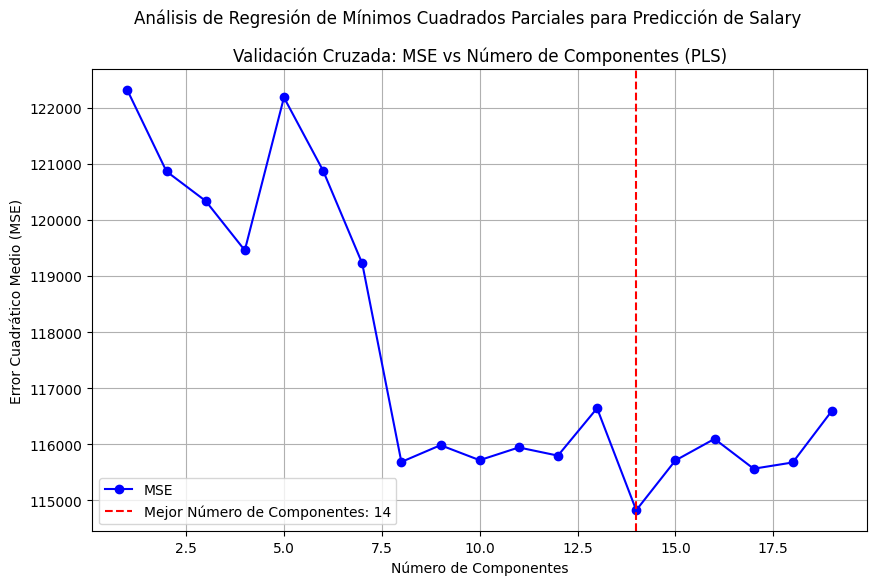

In [ ]:
# Grafico MSE vs Num de componentes
plt.figure(figsize=(10, 6))
plt.plot(range(1, Comp_max + 1), mse, marker='o', linestyle='-', color='b', label='MSE')
plt.axvline(B_comp+1, color='r', linestyle='--', label=f'Mejor Número de Componentes: {B_comp+1}')
plt.xlabel('Número de Componentes')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Validación Cruzada: MSE vs Número de Componentes (PLS)')
plt.suptitle('Análisis de Regresión de Mínimos Cuadrados Parciales para Predicción de Salary', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

La gráfica confirma que la reducción de dimensionalidad es beneficiosa para el problema de predicción del salario. Utilizando PLSRegression , se puede reducir la dimensionalidad a 14 componentes sin comprometer el desempeño predictivo. Esta estrategia no solo mejora la eficiencia del modelo sino que también facilita su interpretación. Sin embargo, es importante continuar explorando alternativas más avanzadas para mejorar aún más el desempeño del modelo.

## **Comparacion de PCA y PLS**
Ambos métodos, PCA y PLSRegression , fueron utilizados para reducir la dimensionalidad del conjunto de datos y predecir el salario (Salary). Aquí se resumen los resultados clave:

**PCA:**
* Mejor Número de Componentes: 18
* Error Cuadrático Medio (MSE): 128,416
* Coeficiente de Determinación ($R^2$): 0.29

**PLSRegression:**
* Mejor Número de Componentes: 14
* Error Cuadrático Medio (MSE): 127,102
* Coeficiente de Determinación ($R^2$): 0.297

Ambos métodos lograron desempeños similares en términos de MSE y $R^2$, pero PLSRegression requirió menos componentes (14 vs. 18) para alcanzar un desempeño equivalente.

La reducción de dimensionalidad mediante PLSRegression es justificada ya que ofrece un desempeño predictivo comparable al de PCA, pero con menos componentes. Aunque los valores de $R^2$ son bajos, esto no invalida la utilidad de la reducción de dimensionalidad, ya que esta técnica mejora la eficiencia, previene el sobreajuste y facilita la interpretación del modelo. Sin embargo, esto puede ser un problema si considerando $R^2$ fuera mas alto entonces sugiere que las variables originales tienen una capacidad explicativa limitada, independientemente de la técnica de reducción dimensional.